In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import datetime

In [38]:
image_collection = io.imread_collection('E:/TSA/Kermanshah_LST/*.tif')

In [39]:
print('Image Collection Shape : ', np.shape(image_collection))

Image Collection Shape :  (3640, 115, 236)


In [40]:
all_image = io.concatenate_images(image_collection)

In [41]:
all_image = all_image / 50

In [42]:
nums = [np.mean(i[i!=0])for i in all_image]
nums = np.array(nums) - 273.15

C:\Users\arad7\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\arad7\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [43]:
dates = [i.split('doy')[1].split('_')[0] for i in image_collection.files]

In [44]:
df = pd.DataFrame()
df['Value'] = nums
df['date']= dates

In [45]:
def datee(date):
    new_date = datetime.datetime.strptime(str(date), '%Y%j')
    return new_date

In [46]:
df['date'] = df['date'].apply(datee)

In [47]:
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif']= 'Comic Sans MS'

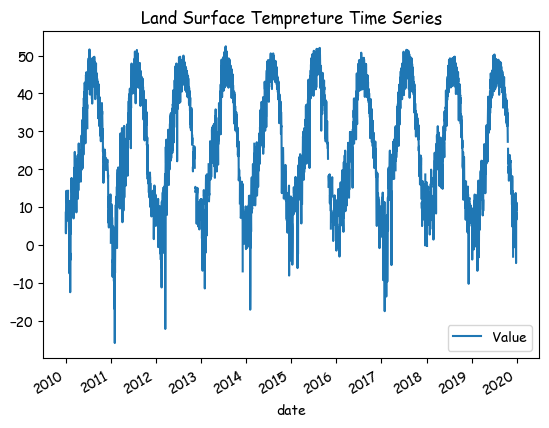

In [48]:
df.plot(x='date', y='Value')
plt.title('Land Surface Tempreture Time Series')
plt.show()